In [43]:
import numpy as np 
import pandas as pd
import seaborn as sns    
import matplotlib.pyplot as plt 
import matplotlib as mpl
import missingno as msno 
import os

In [44]:
# Importing the data set and Retrieving its first 5 values
heart_data= pd.read_csv('Heart_data.csv')
print(heart_data.shape)
heart_data.head()

(319795, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [45]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [46]:
# Checking for values is nan 
nans = heart_data.isna().sum().sort_values(ascending = False)
pct = (nans/heart_data.shape[0]) * 100
pd.concat([nans, pct], axis = 1).rename(columns = { 0 : 'NaNValuesCount', 1 : 'NaNValuesPercentage%'}).round(2)

,NaNValuesCount,NaNValuesPercentage%
HeartDisease,0,0.0
BMI,0,0.0
KidneyDisease,0,0.0
Asthma,0,0.0
SleepTime,0,0.0
GenHealth,0,0.0
PhysicalActivity,0,0.0
Diabetic,0,0.0
Race,0,0.0
AgeCategory,0,0.0


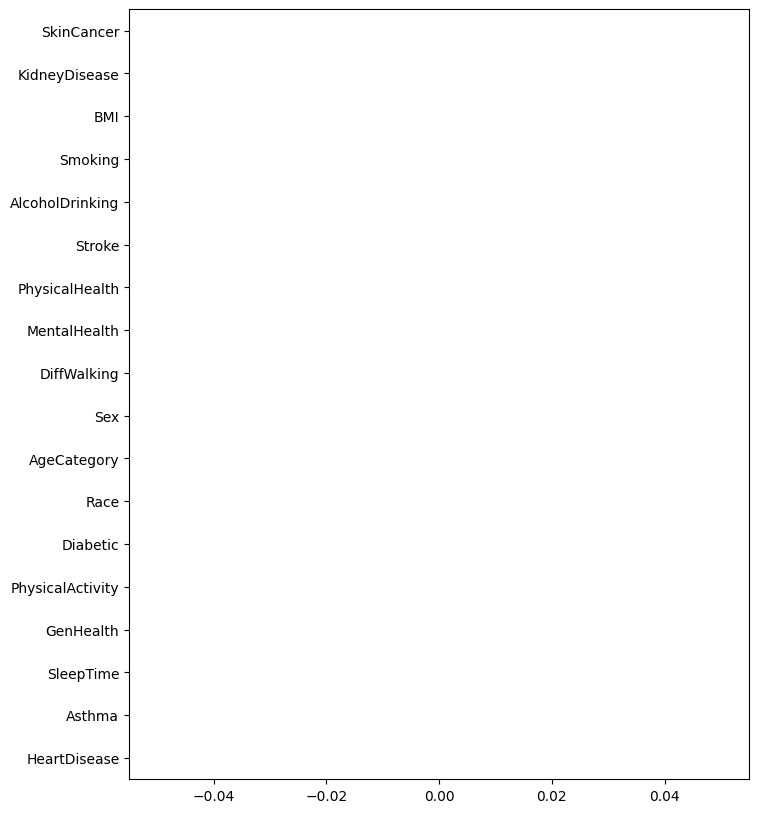

In [47]:
# Set the size
plt.figure(figsize=(8, 10))
# Visual representation of nan values 
heart_data.isna().sum().sort_values().plot(kind='barh')
plt.show()

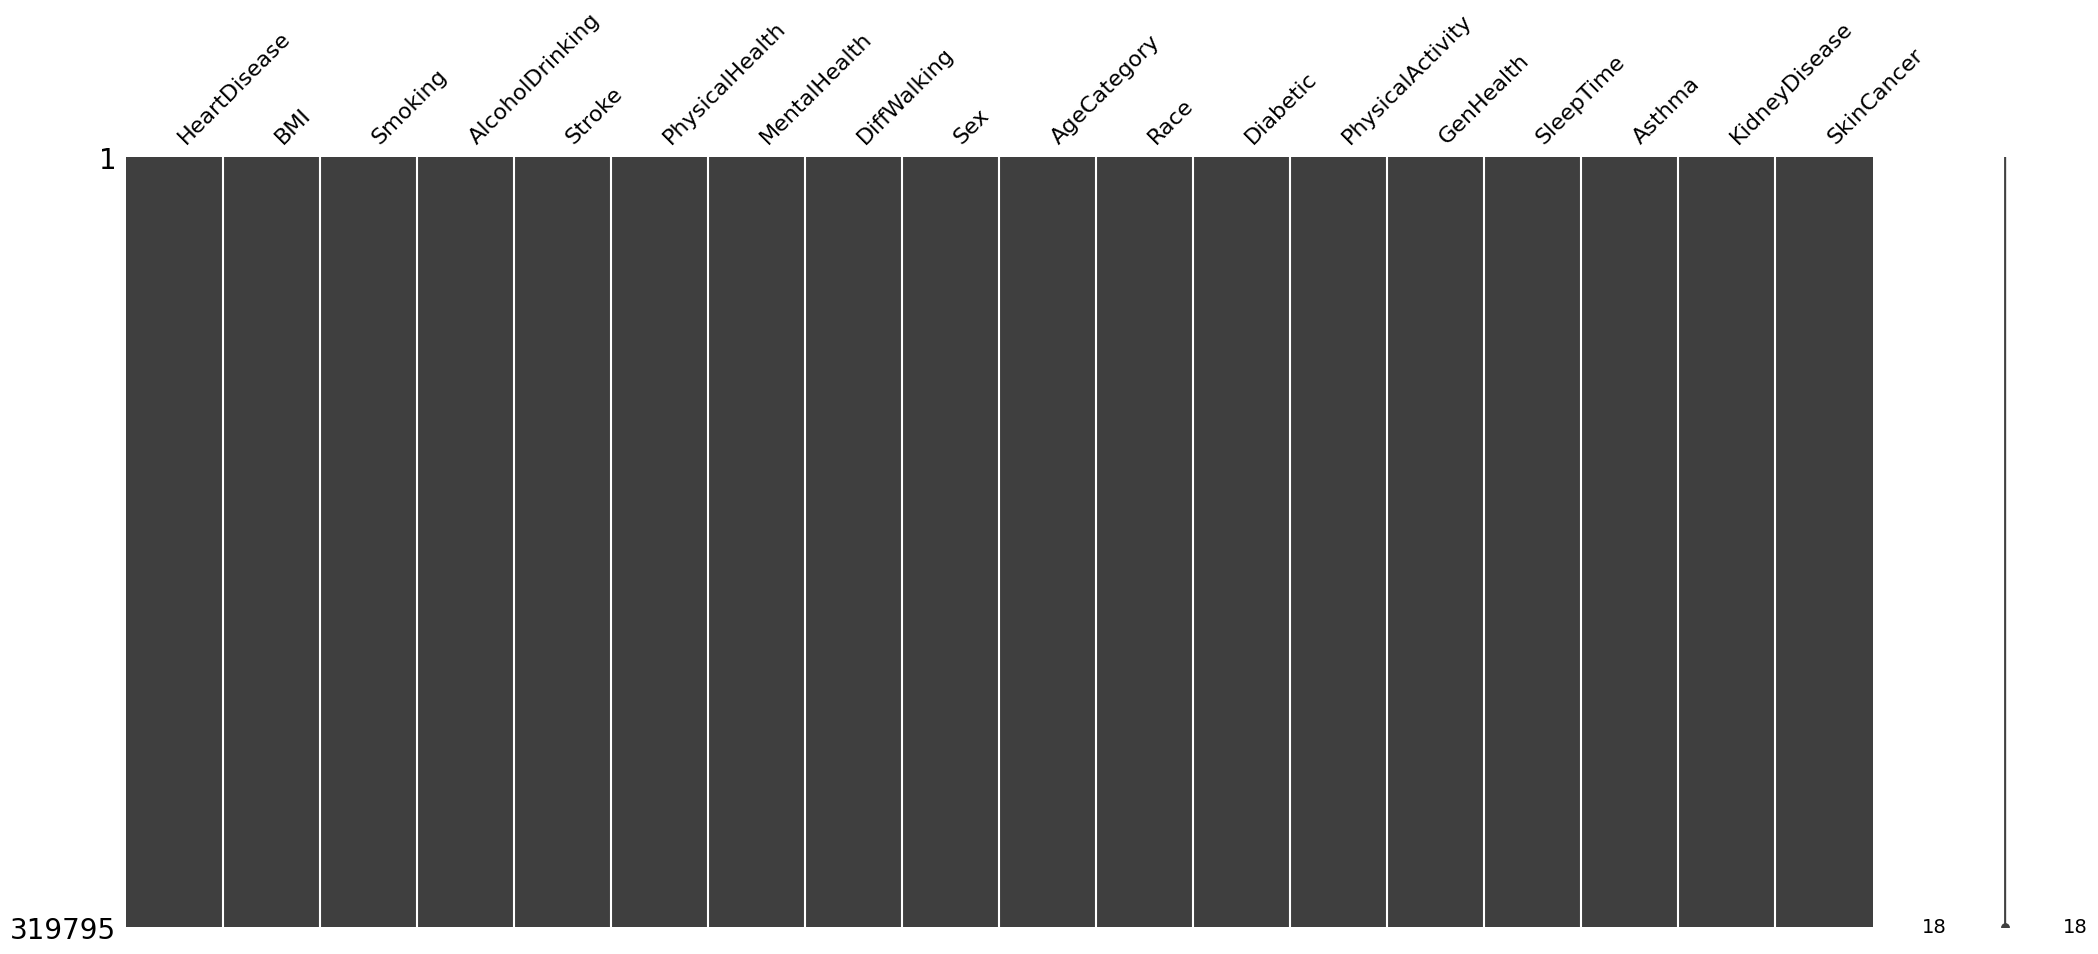

In [48]:
# Chacking for missing values missing
msno.matrix(heart_data)
plt.show()

### Sorting the columns

In [49]:
col_order = ['Sex',  'AgeCategory', 'BMI',  #user info
             'GenHealth', 'PhysicalActivity', 'PhysicalHealth', 'MentalHealth', #genral health and habits
             'SleepTime', 'DiffWalking',
             'Smoking', 'AlcoholDrinking',
             'KidneyDisease', 'Asthma', 'SkinCancer', #user medical history
             'Stroke', 'Diabetic',
             'Race',
             'HeartDisease']

heart_data= heart_data[col_order]
heart_data.head()

,Sex,AgeCategory,BMI,GenHealth,PhysicalActivity,PhysicalHealth,MentalHealth,SleepTime,DiffWalking,Smoking,AlcoholDrinking,KidneyDisease,Asthma,SkinCancer,Stroke,Diabetic,Race,HeartDisease
0,Female,55-59,16.60,Very good,Yes,3.0,30.0,5.0,No,Yes,No,No,Yes,Yes,No,Yes,White,No
1,Female,80 or older,20.34,Very good,Yes,0.0,0.0,7.0,No,No,No,No,No,No,Yes,No,White,No
2,Male,65-69,26.58,Fair,Yes,20.0,30.0,8.0,No,Yes,No,No,Yes,No,No,Yes,White,No
3,Female,75-79,24.21,Good,No,0.0,0.0,6.0,No,No,No,No,No,Yes,No,No,White,No
4,Female,40-44,23.71,Very good,Yes,28.0,0.0,8.0,Yes,No,No,No,No,No,No,No,White,No


### Removing missing values

In [50]:
heart_data = heart_data.dropna()
heart_data.isna().sum()

Sex                 0
AgeCategory         0
BMI                 0
GenHealth           0
PhysicalActivity    0
PhysicalHealth      0
MentalHealth        0
SleepTime           0
DiffWalking         0
Smoking             0
AlcoholDrinking     0
KidneyDisease       0
Asthma              0
SkinCancer          0
Stroke              0
Diabetic            0
Race                0
HeartDisease        0
dtype: int64

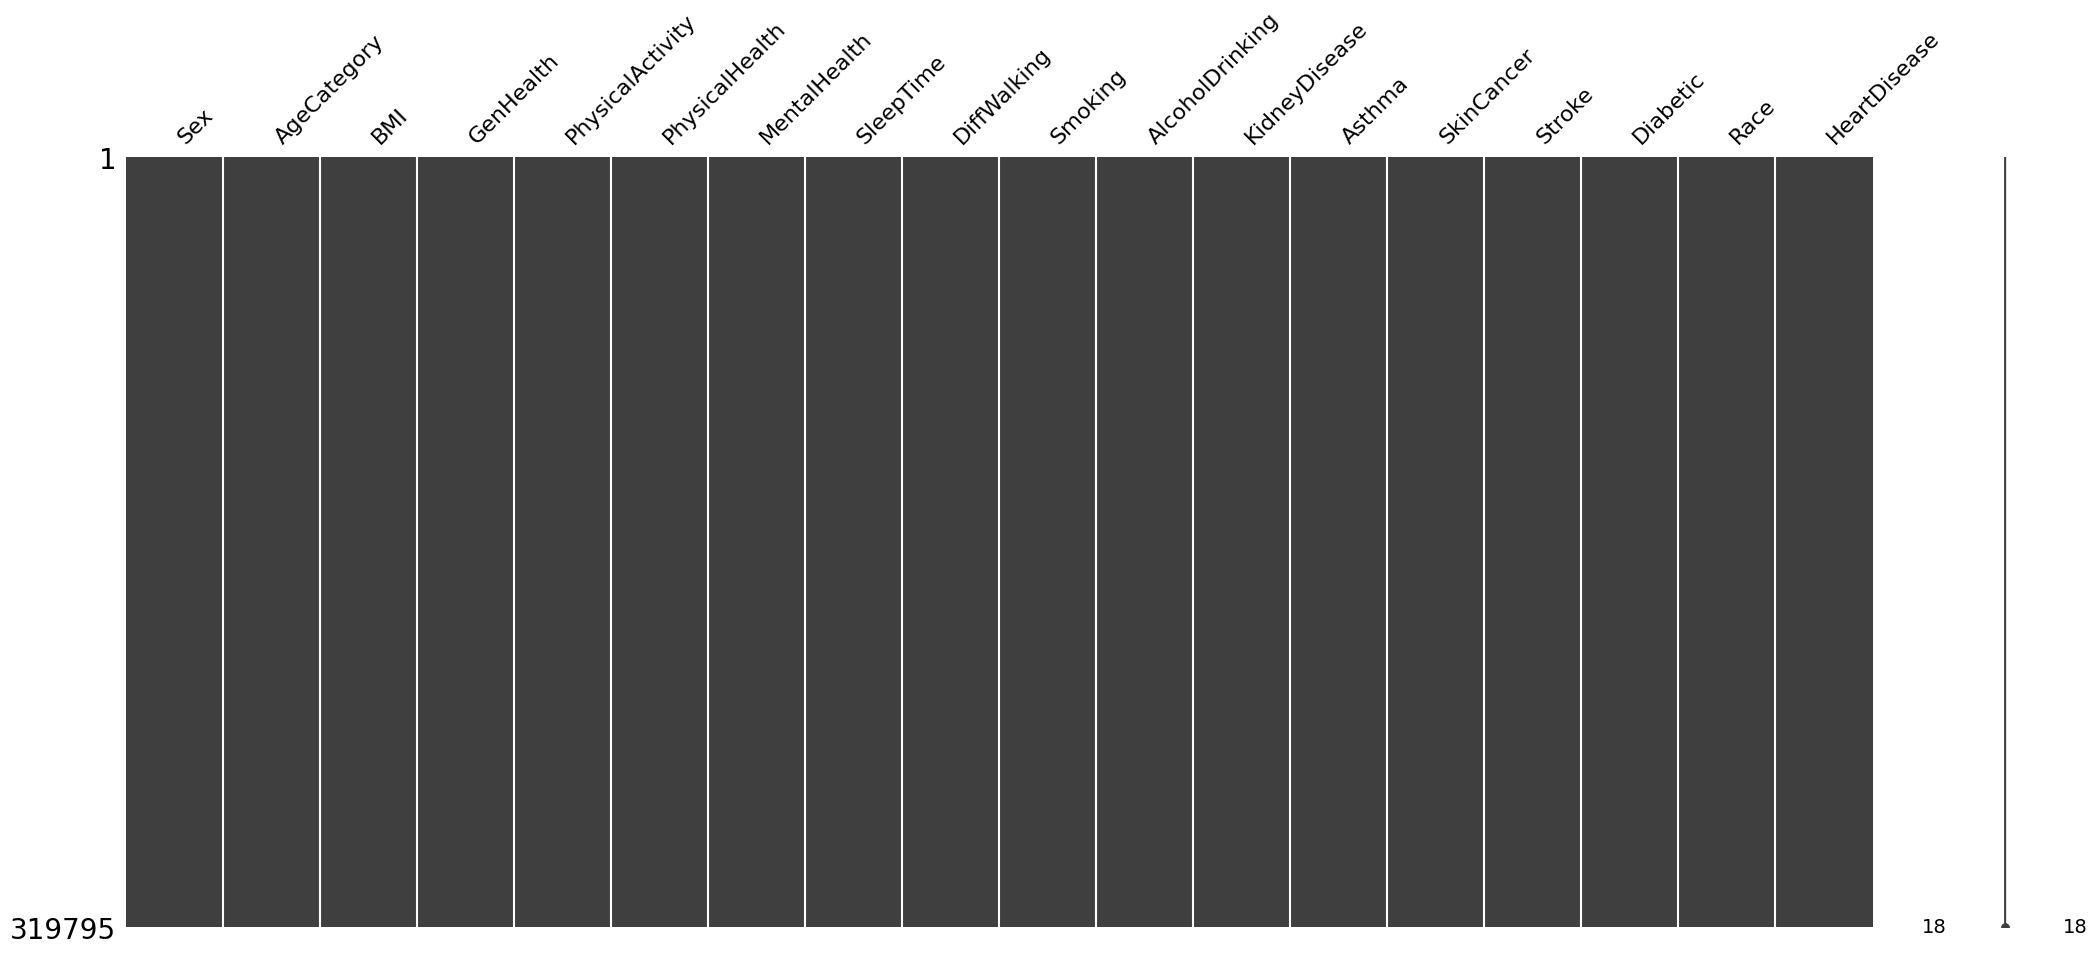

In [51]:
# Checking for  missing values
msno.matrix(heart_data)
plt.show()

### Removing the Duplicate values

In [52]:
#check duplicate
heart_data.duplicated().any()

True

In [53]:
heart_data= heart_data.drop_duplicates()
heart_data.duplicated().any()

False

### Cleaning Categorical Attributes

In [54]:
unique_values = heart_data['Race'].value_counts()
print(unique_values)

Race
White                             227724
Hispanic                           27107
Black                              22810
Other                              10891
Asian                               7993
American Indian/Alaskan Native      5192
Name: count, dtype: int64


In [55]:
unique_values = heart_data['AgeCategory'].value_counts()
print(unique_values)

AgeCategory
65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: count, dtype: int64


In [56]:
heart_data.describe(include='object')

,Sex,AgeCategory,GenHealth,PhysicalActivity,DiffWalking,Smoking,AlcoholDrinking,KidneyDisease,Asthma,SkinCancer,Stroke,Diabetic,Race,HeartDisease
count,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717
unique,2,13,5,2,2,2,2,2,2,2,2,4,6,2
top,Female,65-69,Very good,Yes,No,No,No,No,No,No,No,No,White,No
freq,159671,31670,104796,230412,257362,174312,280136,289941,259066,272425,289653,251796,227724,274456


In [57]:
# Define replacements
replacements = {
    'Yes, but only during pregnancy (female)': 'Yes (during pregnancy)',
    'No, pre-diabetes or borderline diabetes': 'No, borderline diabetes'
}

# Replace specified values in the 'Diabetic' column
heart_data['Diabetic'].replace(replacements, inplace=True)

C:\Users\ashis\AppData\Local\Temp\ipykernel_12696\4042440289.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data['Diabetic'].replace(replacements, inplace=True)


In [58]:
# Iterate over categorical columns, print column name, and display unique values

for col in heart_data.describe(include='object').columns:
    print('Column Name: ',col)
    print(heart_data[col].unique())
    print('*'*60 )

Column Name:  Sex
['Female' 'Male']
************************************************************
Column Name:  AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
************************************************************
Column Name:  GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
************************************************************
Column Name:  PhysicalActivity
['Yes' 'No']
************************************************************
Column Name:  DiffWalking
['No' 'Yes']
************************************************************
Column Name:  Smoking
['Yes' 'No']
************************************************************
Column Name:  AlcoholDrinking
['No' 'Yes']
************************************************************
Column Name:  KidneyDisease
['No' 'Yes']
************************************************************
Column Name:  Asthma
['Yes' 'No']
******************************

In [59]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(heart_data, test_size = 0.2, random_state = 42,
                                      stratify=heart_data['HeartDisease'])
train = train.reset_index(drop = True)
test = test.reset_index(drop = True)

print(train.shape, test.shape)

(241373, 18) (60344, 18)


### Target value is Imbalanced

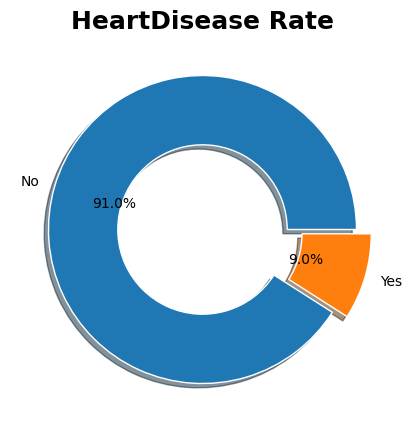

In [60]:
# Plotting the distribution
plt.figure(figsize=(5,5))
HeartDisease_rate = train["HeartDisease"].value_counts()
plt.pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%.1f%%",
        wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode = [0, 0.1], )
plt.title("HeartDisease Rate", fontsize = 18, weight='bold')

plt.show()

### Heart Disease Among different Genders

In [61]:
gender_count=train['Sex'].value_counts()
gender_count

Sex
Female    127570
Male      113803
Name: count, dtype: int64

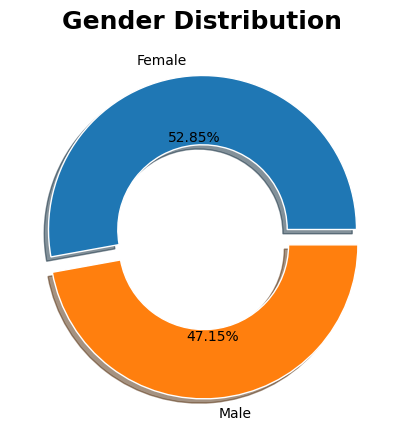

In [62]:
plt.figure(figsize=(5,5))
plt.title("Gender Distribution", fontsize = 18, weight='bold')
plt.pie(gender_count,labels=gender_count.index,radius=1, autopct='%.2f%%',
       wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode = [0, 0.1])

plt.show()

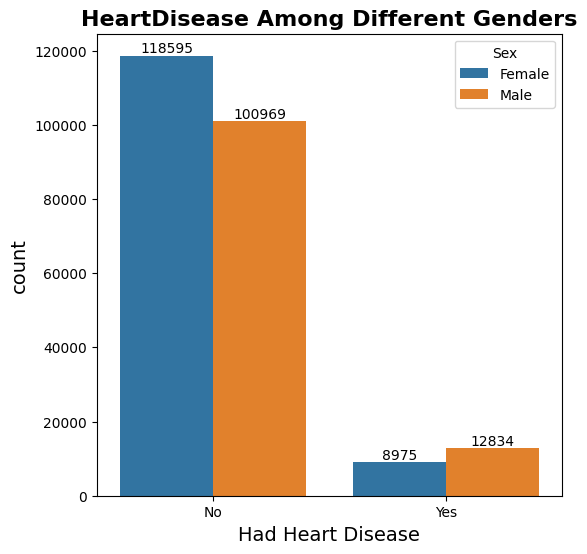

In [63]:
# Set figure size and style
plt.figure(figsize=(6, 6))

# Plot countplot
x = sns.countplot(data=train, x='HeartDisease', hue='Sex')

# Customize plot

x.set_title("HeartDisease Among Different Genders", fontsize=16,  weight='bold')
x.set_xlabel("Had Heart Disease", fontsize=14)
x.set_ylabel("count", fontsize=14)

# Add labels to bars
for c in x.containers:
    x.bar_label(c)

# Show plot
plt.show()

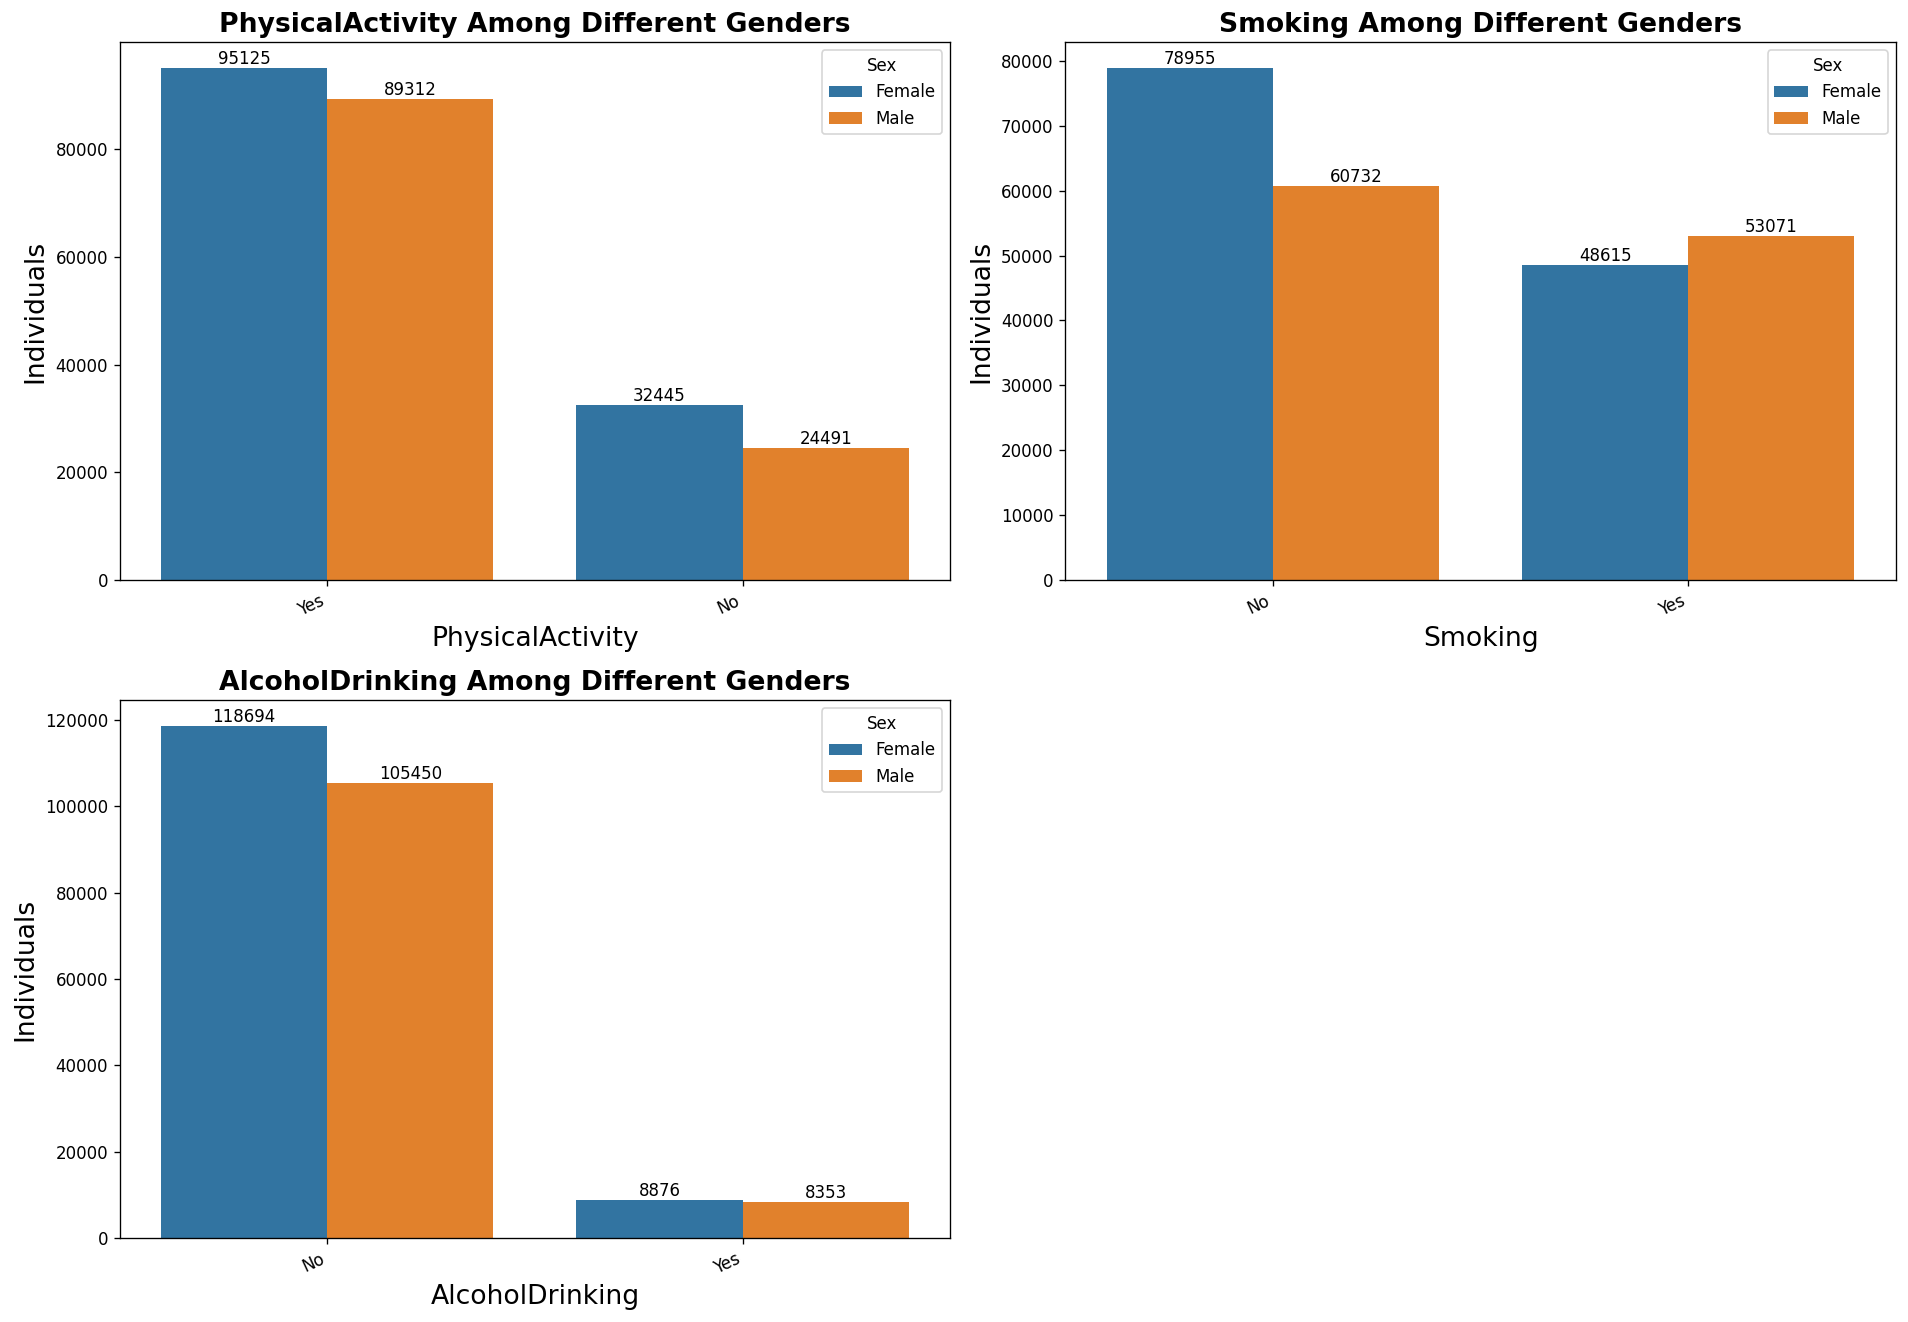

In [64]:
plt.figure(figsize=(16, 16), dpi = 120)
risk_factors = ['PhysicalActivity', 'Smoking', 'AlcoholDrinking']
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(3, 2, i)
    x = sns.countplot(data=train, x=risk_factor, hue='Sex')
    plt.title(f"{risk_factor} Among Different Genders", fontsize=16, weight='bold')
    plt.xlabel(risk_factor, fontsize=16)
    plt.ylabel("Individuals", fontsize=16)
    plt.xticks(size=10,rotation=25, horizontalalignment='right',fontweight='light')
    for c in x.containers:
        x.bar_label(c)
        

plt.tight_layout()
plt.show()

### Heart Disease among different age group

C:\Users\ashis\AppData\Local\Temp\ipykernel_12696\3897677726.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x = sns.countplot(data=train, x='AgeCategory', palette = 'vlag',


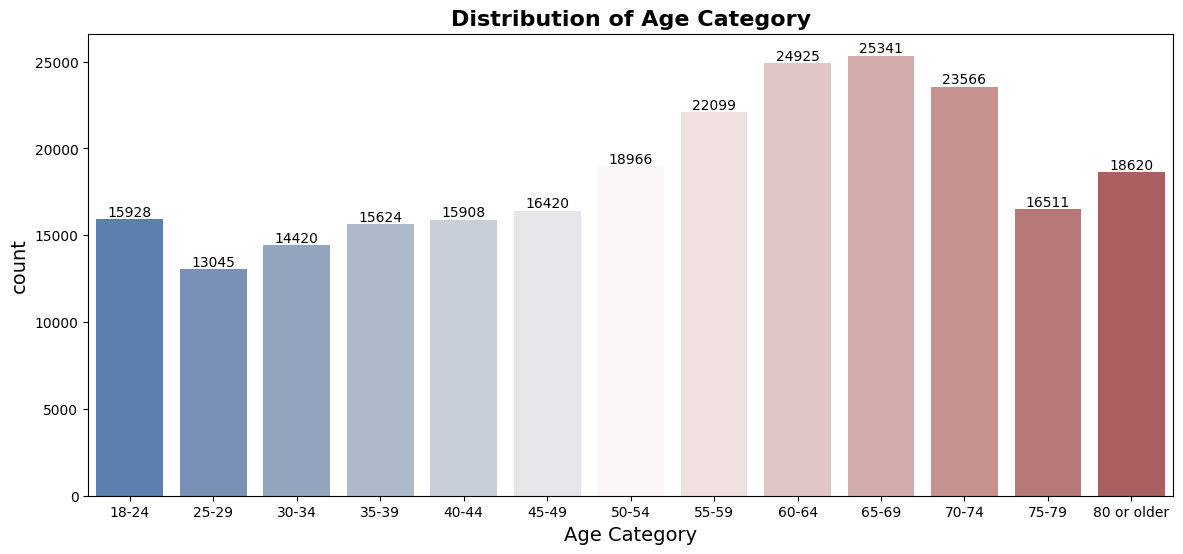

In [65]:
# Remove prefix 'Age' from 'AgeCategory' column
train['AgeCategory'] = train['AgeCategory'].str.replace('Age ', '')

# Set figure size and style
plt.figure(figsize=(14, 6))

# Plot countplot
x = sns.countplot(data=train, x='AgeCategory', palette = 'vlag',
                   order = train['AgeCategory'].value_counts().sort_index().index.values)

# Customize plot
x.set_title('Distribution of Age Category', fontsize=16, weight='bold')
x.set_xlabel('Age Category', fontsize=14)
x.set_ylabel('count', fontsize=14)
x.tick_params(axis='x', rotation=0)

# Add labels to bars
for c in x.containers:
    x.bar_label(c)

# Show plot
plt.show()

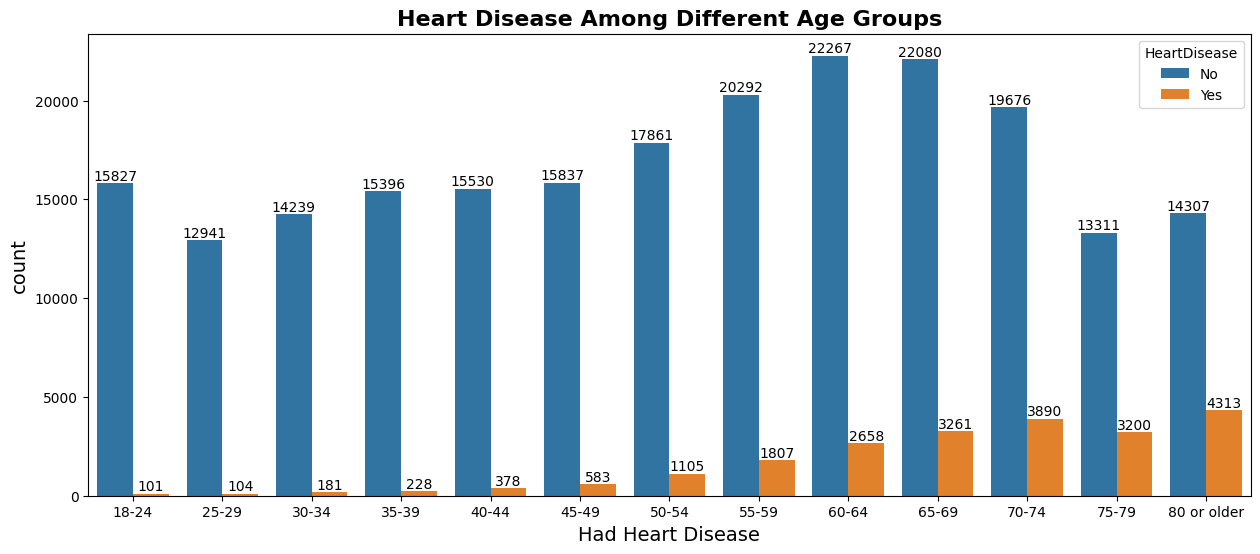

In [66]:
# Set figure size and style
plt.figure(figsize=(15, 6))

# Plot countplot
x = sns.countplot(data=train, x='AgeCategory', hue='HeartDisease',
                   order = train['AgeCategory'].value_counts().sort_index().index.values)

# Customize plot
x.set_title("Heart Disease Among Different Age Groups", fontsize=16, weight='bold')
x.set_xlabel("Had Heart Disease", fontsize=14)
x.set_ylabel("count", fontsize=14)

# Add labels to bars
for c in x.containers:
    x.bar_label(c)

# Show plot
plt.show()

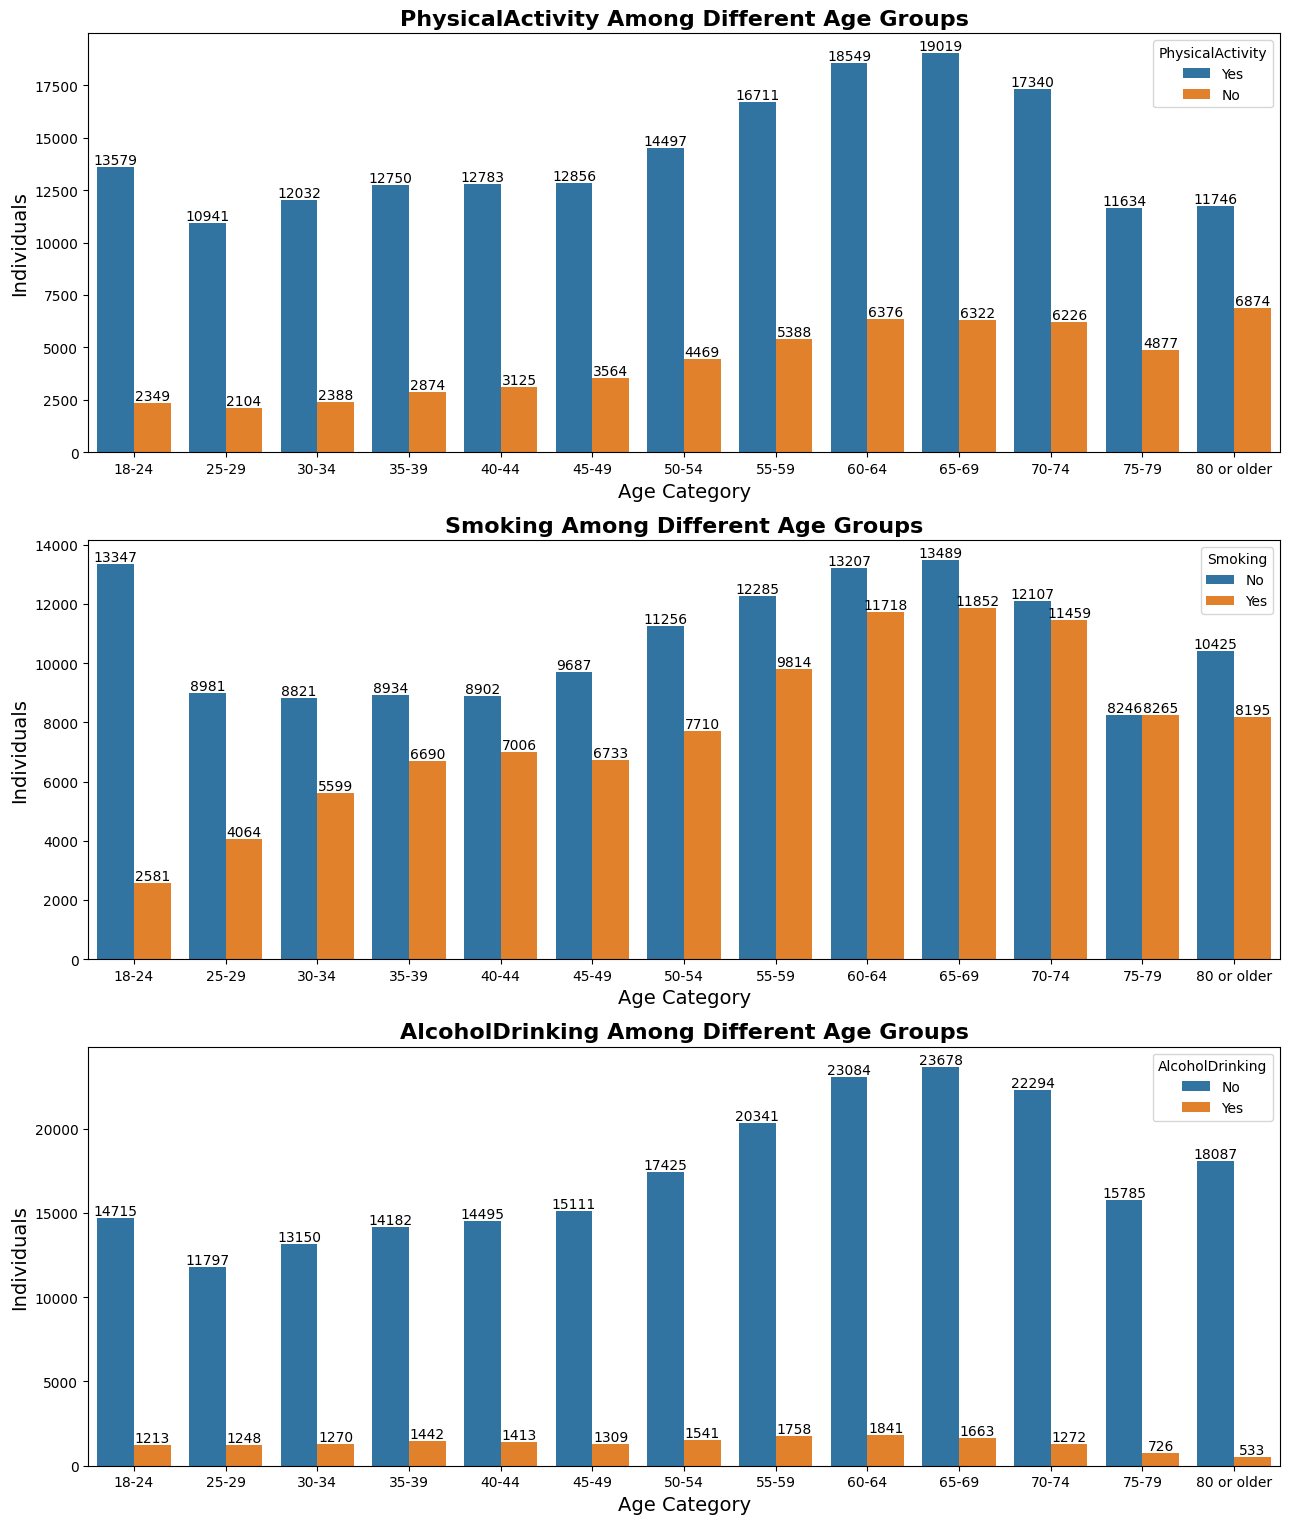

In [67]:
plt.figure(figsize=(13, 25))
risk_factors = ['PhysicalActivity' ,'Smoking','AlcoholDrinking']
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(5, 1, i)
    x = sns.countplot(data=train, x='AgeCategory', hue=risk_factor,
                     order = train['AgeCategory'].value_counts().sort_index().index.values)
    plt.title(f"{risk_factor} Among Different Age Groups", fontsize=16, weight='bold')
    plt.xlabel("Age Category", fontsize=14)
    plt.ylabel("Individuals", fontsize=14)
    for c in x.containers:
        x.bar_label(c)
plt.tight_layout()

plt.show()

### Diabetic

In [68]:
# How Many Individuals in the Dataset are Diabetic
train["Diabetic"].value_counts()

Diabetic
No                         201567
Yes                         32316
No, borderline diabetes      5420
Yes (during pregnancy)       2070
Name: count, dtype: int64

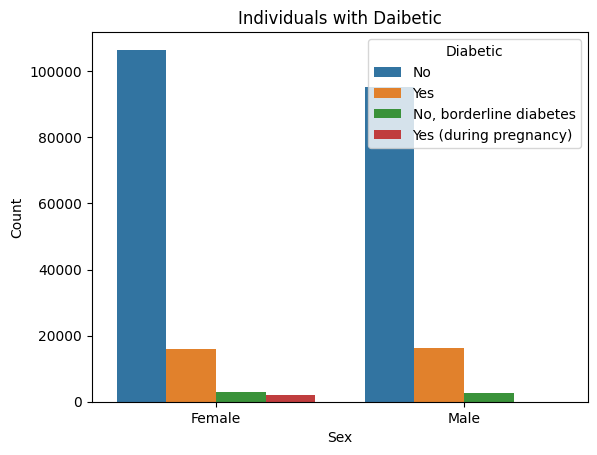

In [69]:
sns.countplot(x = "Sex", hue="Diabetic", data= train)
plt.title("Individuals with Daibetic")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

### Smoke

In [70]:
train["Smoking"].unique()

array(['No', 'Yes'], dtype=object)

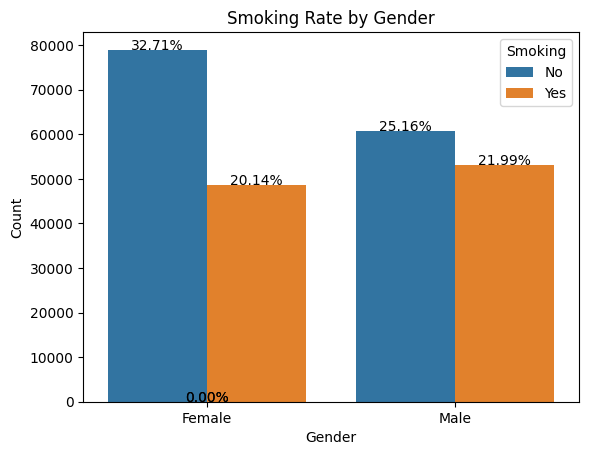

In [71]:
# Create countplot
ax = sns.countplot(x="Sex", hue="Smoking", data=train)

# Add percentages on top of each bar
total = len(train)  # total number of observations

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{height/total:.2%}', ha="center")

# Set plot title, labels, and show the plot
plt.title('Smoking Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Asthma

In [72]:
train['Asthma'].unique()

array(['No', 'Yes'], dtype=object)

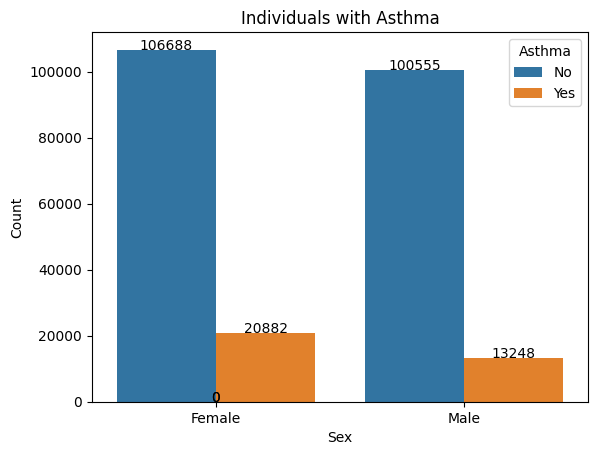

In [73]:
# Create countplot
x = sns.countplot(x = "Sex", hue="Asthma", data= train)

# Add count values on top of each bar
for p in x.patches:
    height = p.get_height()
    x.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{int(height)}', ha="center")

# Set plot title, labels, and show the plot
plt.title('Individuals with Asthma')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### Kidney Disease

In [74]:
train['KidneyDisease'].unique()

array(['No', 'Yes'], dtype=object)

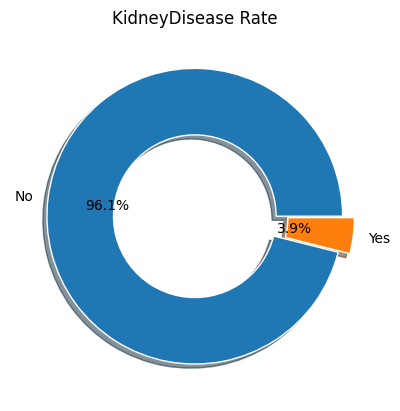

In [75]:
HeartDisease_rate = train["KidneyDisease"].value_counts()
plt.pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%1.1f%%",
        wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode=[0, 0.08])
plt.title("KidneyDisease Rate")
plt.show()

### Numerical Variables

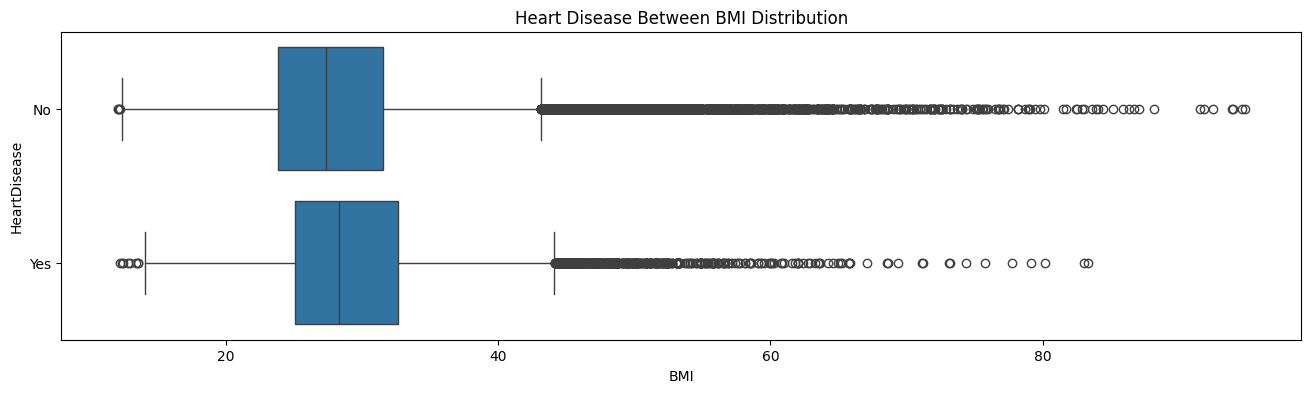

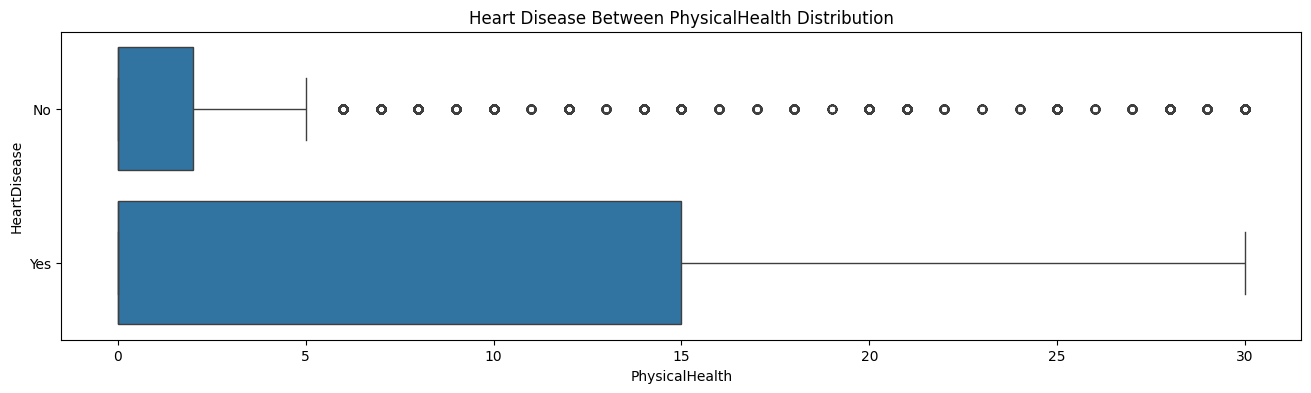

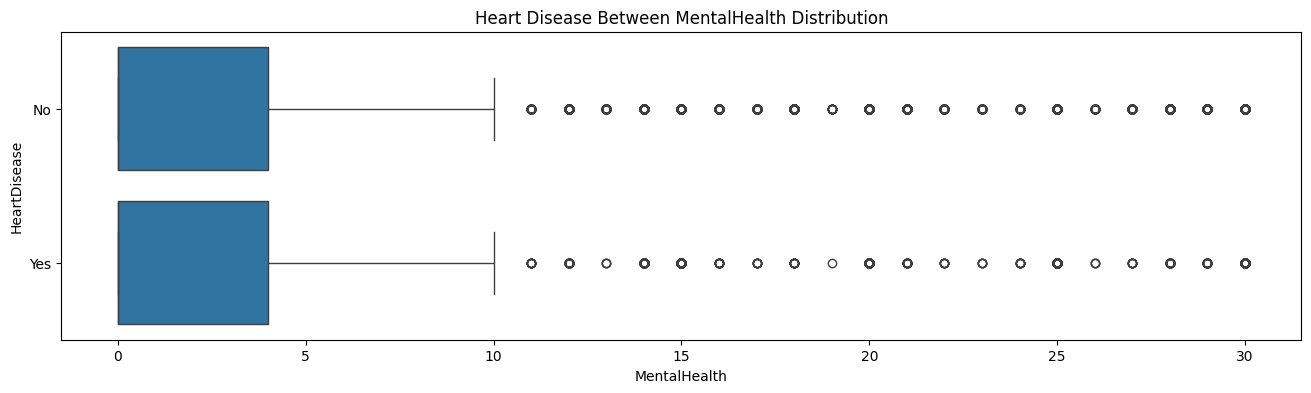

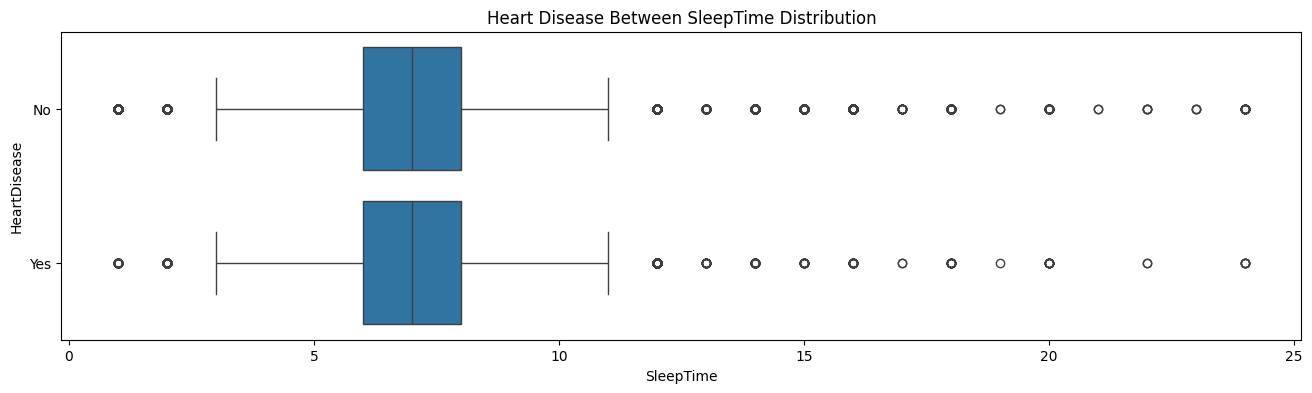

In [76]:
for col in train.describe().columns:
    plt.figure(figsize=(16, 4))
    sns.boxplot(data=train, x=col, y='HeartDisease')
    plt.title(f'Heart Disease Between {col} Distribution')
    plt.show()

In [77]:
def get_outliers(train, column):
    # Calculate quartiles
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define lower and upper limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Extract outliers
    outliers = train[(train[column] < lower_limit) | (train[column] > upper_limit)]
    
    return outliers, lower_limit, upper_limit


In [78]:
sleep_hours_outliers, lower_sleep, upper_sleep = get_outliers(train, 'SleepTime')
print(f"Lower Limit:{lower_sleep})\nUpper Limit:{upper_sleep})")

Lower Limit:3.0)
Upper Limit:11.0)


In [79]:
def drop_outliers(dataframe, columns):
    new_heart_data = dataframe.copy()  # Create a copy of the original DataFrame
    for column in columns:
        # Calculate quartiles
        Q1 = new_heart_data[column].quantile(0.25)
        Q3 = new_heart_data[column].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Define lower and upper limits
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Drop outliers
        dataframe = new_heart_data[(new_heart_data[column] >= lower_limit) & (new_heart_data[column] <= upper_limit)]
    
    return dataframe

In [80]:
# List of columns to check for outliers
columns_to_check = ['PhysicalHealth', 'MentalHealth', 'SleepTime', 'BMI',]

# Call the function to drop outliers from specified columns
train = drop_outliers(train, columns_to_check)

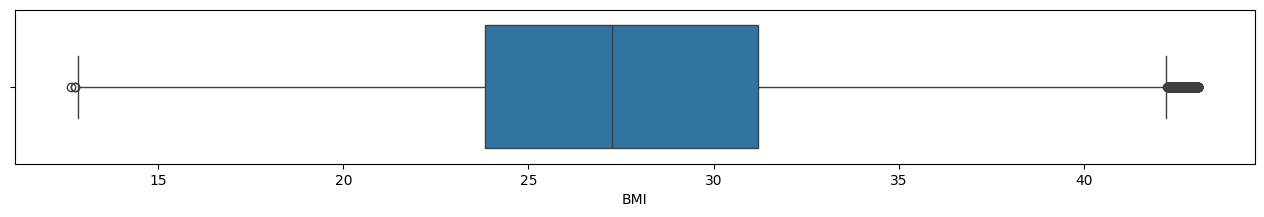

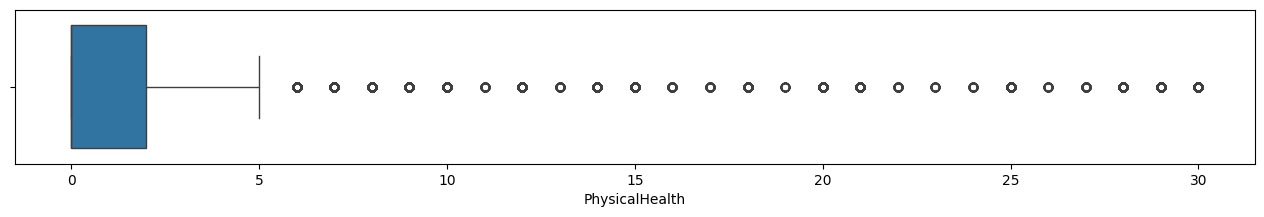

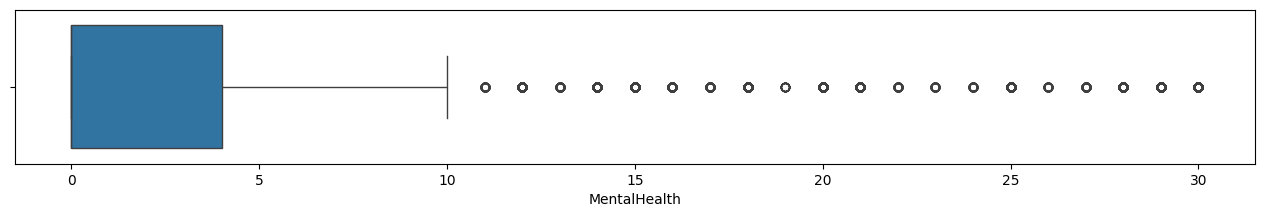

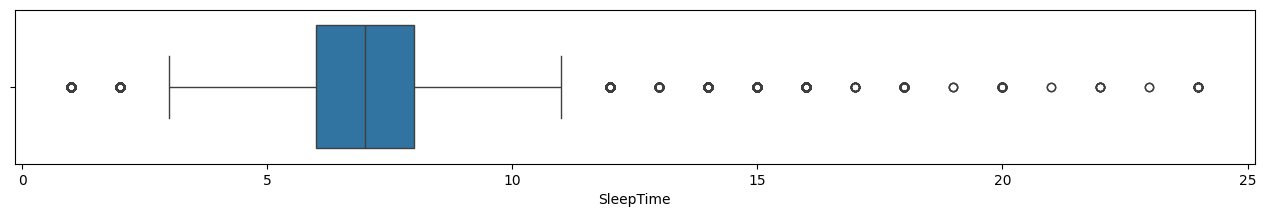

In [81]:
for col in train.describe().columns:
    plt.figure(figsize=(16, 2))
    sns.boxplot(data=train, x=col)
    plt.show()

### **Splitting into Train-Set 70%, Test-Set 30%.**

In [82]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(heart_data, test_size = 0.3, random_state = 42,
                                      stratify=heart_data['HeartDisease'])

train = train.reset_index(drop = True)
test = test.reset_index(drop = True)

print(train.shape, test.shape)
print(round((100*train.shape[0]/heart_data.shape[0]), 2),
      round((100*test.shape[0]/heart_data.shape[0]), 2))

(211201, 18) (90516, 18)
70.0 30.0


In [83]:
column_to_drop=['HeartDisease','Race']
X_train, y_train = train.drop(columns = column_to_drop), train['HeartDisease']
X_test, y_test = test.drop(columns = column_to_drop), test['HeartDisease']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(211201, 16) (211201,)
(90516, 16) (90516,)


In [84]:
num_attris = X_train.select_dtypes(np.number).columns
cat_attris1 = X_train.select_dtypes(object).columns
num_attris = X_test.select_dtypes(np.number).columns
cat_attris2 = X_test.select_dtypes(object).columns

In [85]:
# changing the Categorical value into numerical
from sklearn.base import BaseEstimator, TransformerMixin

class OrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, random_state = 42):
        self.random_state = random_state
        
    def fit(self, X, y = None):
        self.encoding = { 
            'Sex' : dict(zip(['Female', 'Male'], [0, 1])),
            'GenHealth' : dict(zip(['Poor', 'Fair', 'Good',
                                    'Very good', 'Excellent'], range(5))),
            'PhysicalActivity' : dict(zip(['No', 'Yes'], [0, 1])),
            'Stroke' : dict(zip(['No', 'Yes'], [0, 1])),
            'Asthma' :  dict(zip(['No', 'Yes'], [0, 1])),
            'SkinCancer' :  dict(zip(['No', 'Yes'], [0, 1])),
            'Diabetic' : dict(zip(['No',  'No, borderline diabetes',
                                   'Yes (during pregnancy)','Yes'], range(4))),
            'AlcoholDrinking' : dict(zip(['No', 'Yes'], [0, 1])),
            'AgeCategory' : dict(zip(['18-24', '25-29', '30-34', '35-39',
                                        '40-44', '45-49', '50-54', '55-59',
                                        '60-64', '65-69', '70-74', '75-79',
                                        '80 or older'], range(14))),

            'KidneyDisease' : dict(zip(['No', 'Yes'], [0, 1])),
            'Smoking' : dict(zip(['Never smoked', 'No', 'Former smoker', 'Yes',
                                  'Current smoker - now smokes some days',
                                  'Current smoker - now smokes every day',
                                  ], range(10))),

            'DiffWalking' :  dict(zip(['No', 'Yes'], [0, 1])),
                   }
        self.feature_names = X.columns
        
        return self
    
    def transform(self, X):
        X_ = X.copy()
        for col in self.encoding.keys():
            X_[col] = X_[col].map(self.encoding[col])
            X_[col] = X_[col].astype('int')
        return X_
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)
    
    def get_feature_names_out(self, names = None):
        return self.feature_names
    
    
encoder = OrdinalEncoder()
encoder.fit_transform(X_train[cat_attris1]).head()

encoder = OrdinalEncoder()
encoder.fit_transform(X_test[cat_attris2]).head()

,Sex,AgeCategory,GenHealth,PhysicalActivity,DiffWalking,Smoking,AlcoholDrinking,KidneyDisease,Asthma,SkinCancer,Stroke,Diabetic
0,0,4,3,1,0,1,0,0,0,0,0,0
1,0,4,3,1,0,1,0,0,0,0,0,0
2,0,9,3,1,0,1,0,0,0,0,0,2
3,1,10,2,1,0,3,0,0,0,1,0,0
4,0,6,1,1,1,3,0,0,1,0,0,0


### Transformation for skewed numerical attributes 

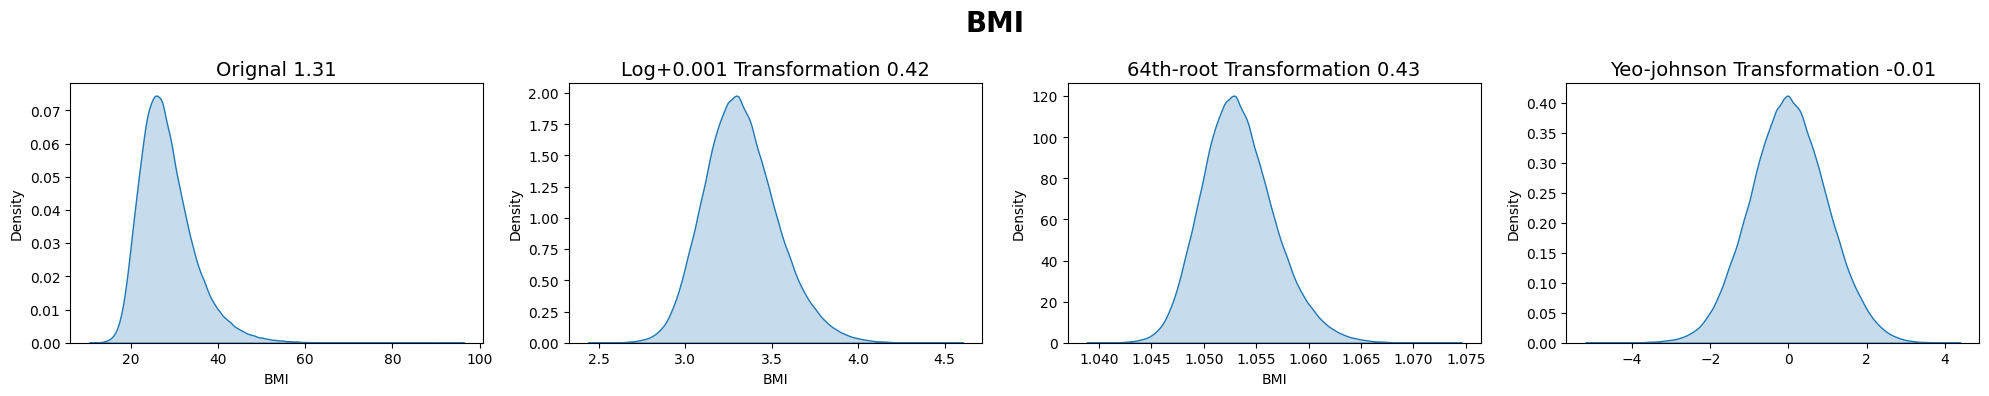

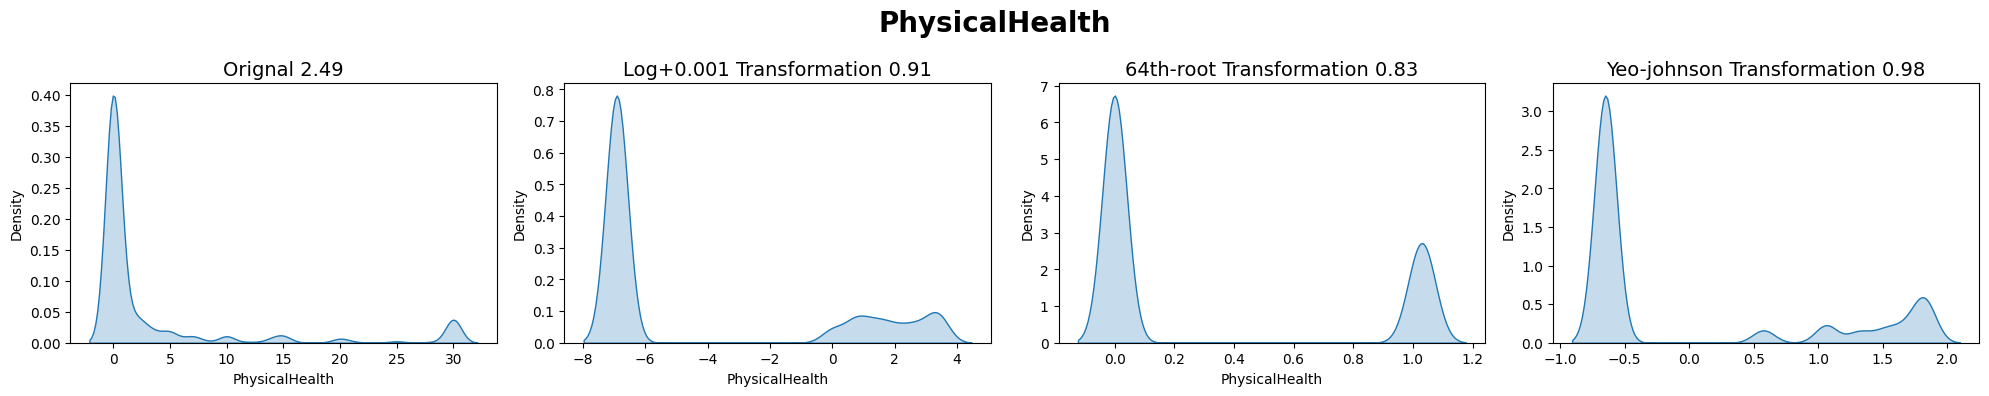

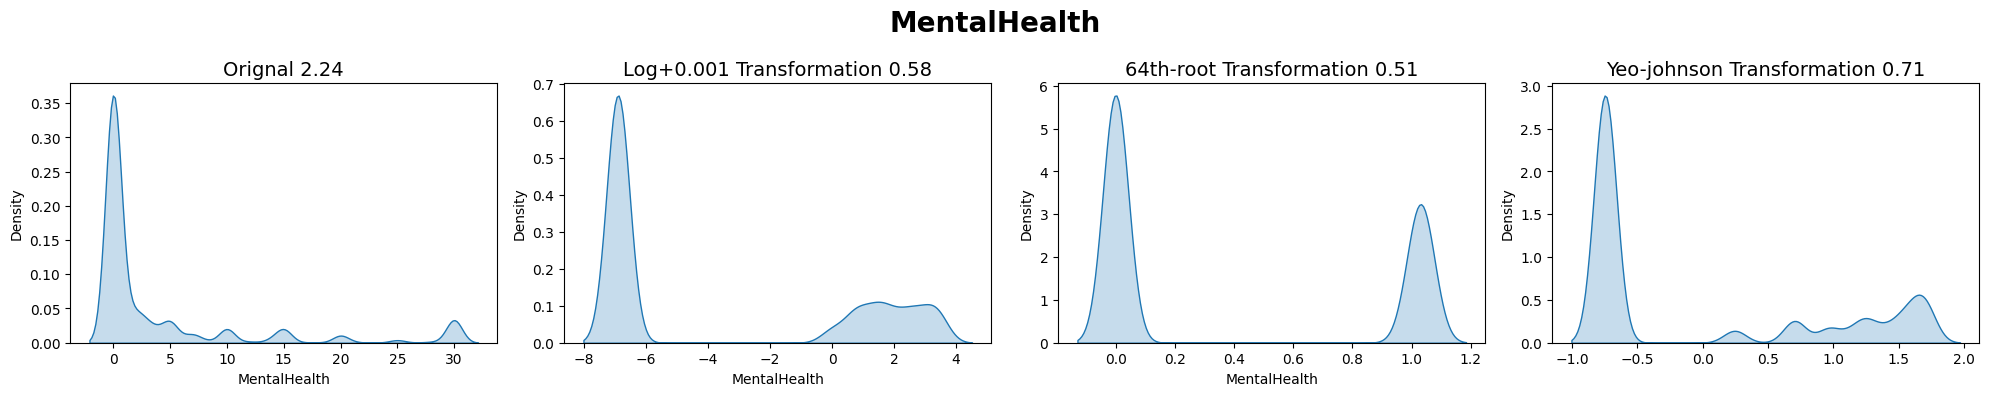

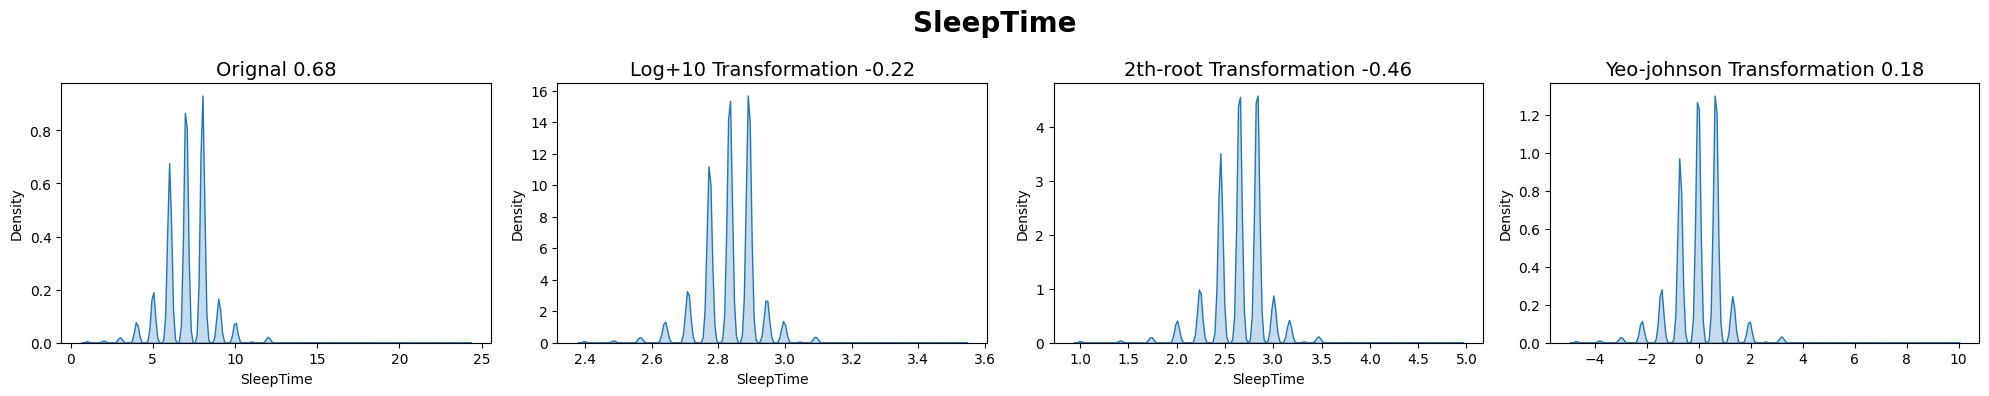

In [86]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

for attr in num_attris:
    fig, ax = plt.subplots(1, 4, figsize=(20,4))

    skf = X_train[attr].skew().round(2)
    sns.kdeplot(X_train[attr], fill = True, ax=ax[0])
    ax[0].set_title(f'Orignal {skf}', fontsize=14)

    
    gridsv, x, skf = [0.001, 1, 10, 100, 1000, 10000], 0.001, 200
    for i in gridsv:
        n_skf = skew(np.log(i+X_train[attr]))
        if abs(n_skf) < abs(skf):
            x, skf = i, n_skf    
            
    log_bmi = np.log(x+X_train[attr])
    skf = round( skew(log_bmi), 2)
    sns.kdeplot(log_bmi, fill = True, ax=ax[1])
    ax[1].set_title(f'Log+{x} Transformation {skf}', fontsize=14)


    gridsv, x, skf = [1/2, 1/4, 1/8, 1/16, 1/32, 1/64], 1/2, 200
    for i in gridsv:
        n_skf = skew(np.power(X_train[attr], i))
        if abs(n_skf) < abs(skf):
            x, skf = i, n_skf  

    sqrt_bmi = np.power(X_train[attr], x)
    sns.kdeplot(sqrt_bmi, fill = True, ax=ax[2])
    skf = round(skew(sqrt_bmi), 2)
    ax[2].set_title(f'{int(1/x)}th-root Transformation {skf}', fontsize=14)

    transformer = PowerTransformer()
    yeo_bmi = transformer.fit_transform((X_train[[attr]]+1))[:,  0]
    skf = round(skew(yeo_bmi), 2)
    sns.kdeplot(yeo_bmi, fill = True, ax=ax[3])
    ax[3].set_title(f'Yeo-johnson Transformation {skf}', fontsize=14)
    

    plt.suptitle(attr, fontsize=20, weight='bold')
    plt.tight_layout(pad=1.1)
    plt.show()

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# ['SleepTime', 'BMI']
num_pipeline0 = Pipeline([
    ('transform', PowerTransformer()),
    ('scale',StandardScaler()) ])
num_pipeline0

Pipeline(steps=[('transform', PowerTransformer()), ('scale', StandardScaler())])

In [88]:
class NRootTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n = 1/2, random_state = 42):
        self.random_state = random_state
        self.n = n
        
    def fit(self, X, y = None):
        self.feature_names = X.columns
        return self
    
    def transform(self, X):
        return np.power(X, self.n)
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)
    
    def get_feature_names_out(self, names = None):
        return self.feature_names
    
    
transformer = NRootTransformer(n = 1/32)
transformer.fit_transform(X_train[['PhysicalHealth', 'MentalHealth']]).head()

transformer = NRootTransformer(n = 1/32)
transformer.fit_transform(X_test[['PhysicalHealth', 'MentalHealth']]).head()

,PhysicalHealth,MentalHealth
0,0.000000,1.034928
1,0.000000,1.034928
2,0.000000,0.000000
3,0.000000,0.000000
4,1.085967,0.000000


In [89]:
# ['PhysicalHealth', 'MentalHealth']
num_pipeline1 = Pipeline([
    ('transform', NRootTransformer(n = 1/32)),
    ('scale',StandardScaler()) ])
num_pipeline1


Pipeline(steps=[('transform', NRootTransformer(n=0.03125)),
                ('scale', StandardScaler())])

In [90]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder


ord_cat_attris = ['Sex', 'GenHealth', 'PhysicalActivity', 'Stroke', 'Asthma',
               'SkinCancer', 'Diabetic', 'AlcoholDrinking', 'AgeCategory',
               'KidneyDisease', 'Smoking', 'DiffWalking']

preprocessing_pipeline = ColumnTransformer([
    ('num_pipeline0', num_pipeline0, ['BMI', 'SleepTime']),
    ('num_pipeline1', num_pipeline1, ['PhysicalHealth', 'MentalHealth']),
    ('ord_pipeline', OrdinalEncoder(), ord_cat_attris),
                                ])

preprocessing_pipeline

ColumnTransformer(transformers=[('num_pipeline0',
                                 Pipeline(steps=[('transform',
                                                  PowerTransformer()),
                                                 ('scale', StandardScaler())]),
                                 ['BMI', 'SleepTime']),
                                ('num_pipeline1',
                                 Pipeline(steps=[('transform',
                                                  NRootTransformer(n=0.03125)),
                                                 ('scale', StandardScaler())]),
                                 ['PhysicalHealth', 'MentalHealth']),
                                ('ord_pipeline', OrdinalEncoder(),
                                 ['Sex', 'GenHealth', 'PhysicalActivity',
                                  'Stroke', 'Asthma', 'SkinCancer', 'Diabetic',
                                  'AlcoholDrinking', 'AgeCategory',
                                  'KidneyDisease', 'Smoking', 'DiffWalking'])])

In [91]:
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

print(X_train_processed.shape)
X_train_processed[0]

(211201, 16)


array([-1.08579897,  0.63840577, -0.66698828, -0.77639411,  0.        ,
        3.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , 12.        ,  0.        ,  1.        ,
        0.        ])

In [92]:
y_train = y_train.replace({'Yes': 1, 'No' : 0})
y_test = y_test.replace({'Yes': 1, 'No' : 0})

y_train.shape, y_test.shape

C:\Users\ashis\AppData\Local\Temp\ipykernel_12696\23375430.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'Yes': 1, 'No' : 0})
C:\Users\ashis\AppData\Local\Temp\ipykernel_12696\23375430.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'Yes': 1, 'No' : 0})


((211201,), (90516,))

In [93]:
from sklearn.linear_model import LogisticRegression

Model = LogisticRegression(max_iter=10000)
Model.fit(X_train_processed, y_train)

LogisticRegression(max_iter=10000)

In [94]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

y_pred=Model.predict(X_train_processed)
accuracy=accuracy_score(y_train,y_pred)
accuracy

0.9110278833907036

In [95]:

y_pred = Model.predict(X_test_processed)


accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9110654469927969

In [96]:
import pickle as pk

In [97]:
pipeline=Pipeline([
    ('preprocessing',preprocessing_pipeline),
    ('regression',LogisticRegression())
])

pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline0',
                                                  Pipeline(steps=[('transform',
                                                                   PowerTransformer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['BMI', 'SleepTime']),
                                                 ('num_pipeline1',
                                                  Pipeline(steps=[('transform',
                                                                   NRootTransformer(n=0.03125)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['PhysicalHealth',
                                                   'MentalHealth']),
                                                 ('ord_pipeline',
                                                  OrdinalEncoder(),
                                                  ['Sex', 'GenHealth',
                                                   'PhysicalActivity', 'Stroke',
                                                   'Asthma', 'SkinCancer',
                                                   'Diabetic',
                                                   'AlcoholDrinking',
                                                   'AgeCategory',
                                                   'KidneyDisease', 'Smoking',
                                                   'DiffWalking'])])),
                ('regression', LogisticRegression())])

In [98]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline0',
                                                  Pipeline(steps=[('transform',
                                                                   PowerTransformer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['BMI', 'SleepTime']),
                                                 ('num_pipeline1',
                                                  Pipeline(steps=[('transform',
                                                                   NRootTransformer(n=0.03125)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['PhysicalHealth',
                                                   'MentalHealth']),
                                                 ('ord_pipeline',
                                                  OrdinalEncoder(),
                                                  ['Sex', 'GenHealth',
                                                   'PhysicalActivity', 'Stroke',
                                                   'Asthma', 'SkinCancer',
                                                   'Diabetic',
                                                   'AlcoholDrinking',
                                                   'AgeCategory',
                                                   'KidneyDisease', 'Smoking',
                                                   'DiffWalking'])])),
                ('regression', LogisticRegression())])

In [99]:
X_train.head(6)

,Sex,AgeCategory,BMI,GenHealth,PhysicalActivity,PhysicalHealth,MentalHealth,SleepTime,DiffWalking,Smoking,AlcoholDrinking,KidneyDisease,Asthma,SkinCancer,Stroke,Diabetic
0,Female,80 or older,22.14,Very good,No,0.0,0.0,8.0,No,No,No,No,No,No,No,No
1,Male,60-64,26.58,Very good,Yes,5.0,0.0,7.0,No,Yes,No,No,No,No,No,No
2,Male,40-44,28.12,Excellent,Yes,0.0,0.0,9.0,No,No,No,No,No,No,No,Yes
3,Female,55-59,34.02,Good,Yes,1.0,0.0,7.0,No,Yes,No,No,No,No,No,No
4,Male,60-64,31.57,Good,Yes,0.0,0.0,7.0,No,Yes,No,No,Yes,No,No,"No, borderline diabetes"
5,Male,60-64,30.24,Very good,Yes,0.0,0.0,8.0,No,No,No,No,No,No,No,No


In [100]:
with open('Heart_model.pkl','wb') as file:
    pk.dump(pipeline,file)

In [110]:
import pandas as pd
# Define the data as a list of dictionaries
data = [
    {'Sex': 'Male', 'AgeCategory': '18-24', 'BMI': 25.3, 'GenHealth': 'Fair', 'PhysicalActivity': 'No',
     'PhysicalHealth': 0.0, 'MentalHealth': 0.0, 'SleepTime': 11.0, 'DiffWalking': 'No', 'Smoking': 'No',
     'AlcoholDrinking': 'No', 'KidneyDisease': 'No', 'Asthma': 'No', 'SkinCancer': 'No', 'Stroke': 'No',
     'Diabetic': 'No'}
]

# Create the DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


    Sex AgeCategory   BMI GenHealth PhysicalActivity  PhysicalHealth  \
0  Male       18-24  25.3      Fair               No             0.0   

   MentalHealth  SleepTime DiffWalking Smoking AlcoholDrinking KidneyDisease  \
0           0.0       11.0          No      No              No            No   

  Asthma SkinCancer Stroke Diabetic  
0     No         No     No       No  


In [111]:
with open('Heart_model.pkl', 'rb') as f:
    model = pk.load(f)

predict=model.predict(df)

In [112]:
predict

array([0], dtype=int64)